In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
d = tf.range(-10,10)
d

<tf.Tensor: shape=(20,), dtype=int32, numpy=
array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9])>

In [3]:
d = tf.cast(d,tf.float32)
d

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

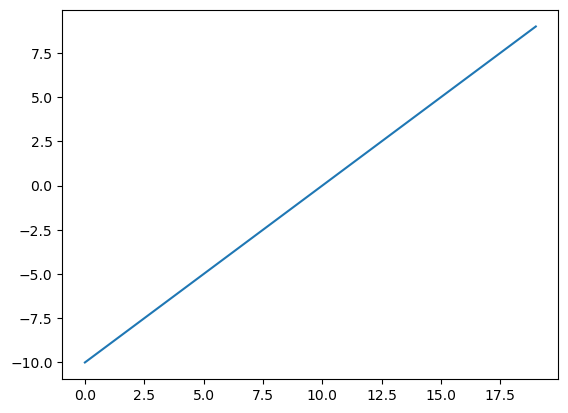

In [5]:
plt.plot(d)

In [6]:
def sigmoid_function(x):
    return 1 / (1 + tf.exp(-x))

In [7]:
sigmoid = sigmoid_function(d)
sigmoid

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

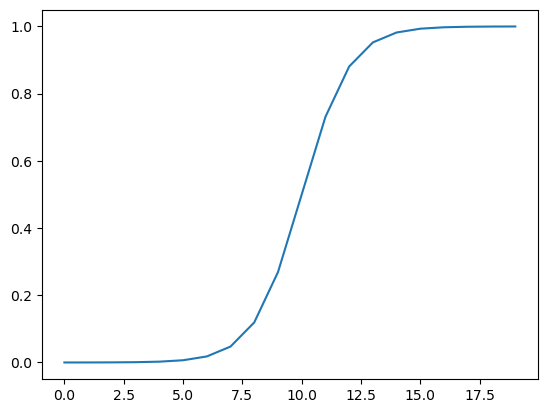

In [8]:
plt.plot(sigmoid)

In [9]:
def relu_function(x):
    return tf.maximum(0,x)

In [10]:
relu = relu_function(d)
relu

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

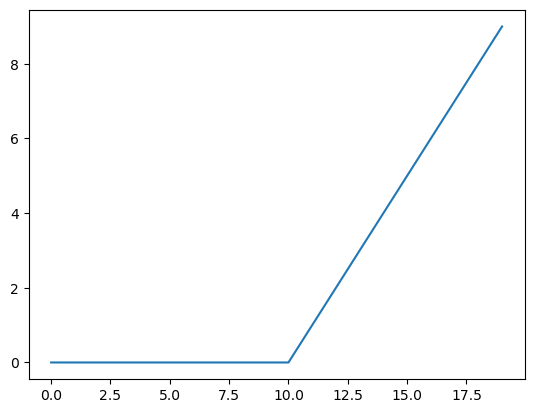

In [11]:
plt.plot(relu)

In [12]:
def linear_function(x):
    return tf.keras.activations.linear(x)

In [14]:
linear = linear_function(d)
linear

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

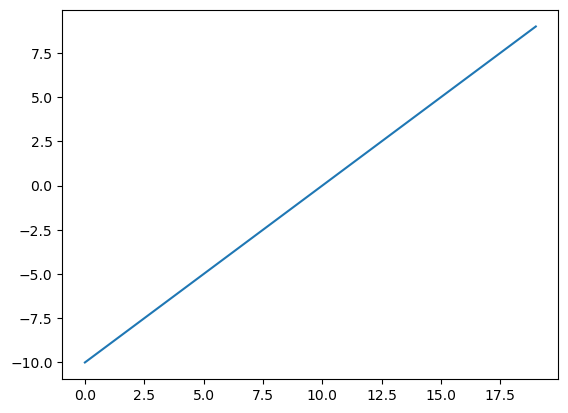

In [15]:
plt.plot(linear)

In [23]:
def softmax_default(x):
    return tf.keras.activations.softmax(tf.reshape(x,shape=(-1,1)))

In [53]:
def softmax_custom(x):
    e = np.exp(x - tf.reduce_max(x, axis=-1, keepdims=True))
    s = tf.reduce_sum(e, axis=-1, keepdims=True)
    output = e/s
    output._keras_logits = x
    exponentiated = np.exp(x)
    probabilities = exponentiated / np.sum(exponentiated)
    print('probabilities sum',probabilities.sum())
    return output

In [54]:
softmax_def = softmax_default(d)
softmax_cus = softmax_custom(d)
softmax_def,softmax_cus

probabilities sum 1.0


(<tf.Tensor: shape=(20, 1), dtype=float32, numpy=
 array([[0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994],
        [0.99999994],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ]], dtype=float32)>,
 <tf.Tensor: shape=(20,), dtype=float32, numpy=
 array([3.5416430e-09, 9.6271835e-09, 2.6169399e-08, 7.1135801e-08,
        1.9336716e-07, 5.2562643e-07, 1.4288007e-06, 3.8838830e-06,
        1.0557489e-05, 2.8698230e-05, 7.8009878e-05, 2.1205282e-04,
        5.7641935e-04, 1.5668704e-03, 4.2591952e-03, 1.1577693e-02,
        3.1471431e-02, 8.5548215e-02, 2.3254417e-01, 6.3212061e-01],
       dtype=float32)>)

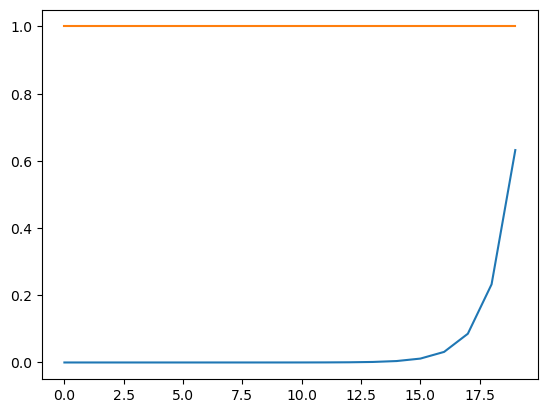

In [39]:
plt.plot(softmax_cus)
plt.plot(softmax_def)

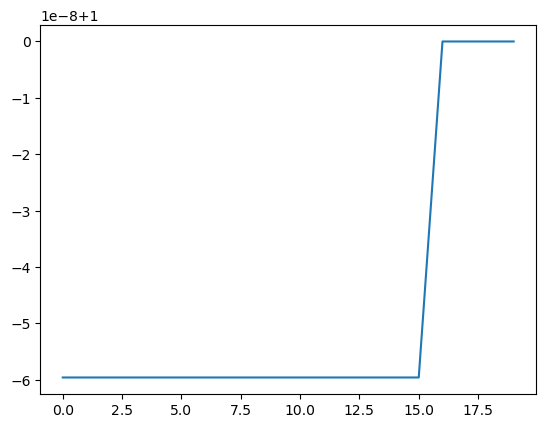

In [40]:
plt.plot(softmax_def)

In [28]:
output_layer = np.array([1.3, 5.1, 2.2, 0.7, 1.1])
output_layer

array([1.3, 5.1, 2.2, 0.7, 1.1])

In [29]:
exponentiated = np.exp(output_layer)
exponentiated

array([  3.66929667, 164.0219073 ,   9.0250135 ,   2.01375271,
         3.00416602])

In [30]:
probabilities = exponentiated / np.sum(exponentiated)
probabilities

array([0.02019046, 0.90253769, 0.04966053, 0.01108076, 0.01653055])

In [31]:
probabilities.sum()

1.0

In [52]:
d.shape.rank

1